# Cars Price Dataset

**About Dataset**
This dataset consist of data From 1985 Ward's Automotive Yearbook. Here are the sources

**Sources:**

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038
3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

**Content**
This data set consists of three types of entities: 
- (a) the specification of an auto in terms of various characteristics, 
- (b) its assigned insurance risk rating, 
- (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
- The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.

----------

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)


## Load Dataset

In [2]:
df = pd.read_csv('D:/DS Bootcamp/Machine Learning/ML Assignment/Assignment 1/cars_price.csv')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,NaN,2548.0,dohc,NaN,NaN,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,13495
1,3.0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,NaN,four,130.0,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,16500
2,1.0,?,alfa-romero,gas,std,two,hatchback,rwd,NaN,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,NaN,3.47,9.0,154,NaN,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,NaN,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,NaN,sedan,4wd,front,99.4,NaN,NaN,54.3,2824.0,NaN,five,136.0,mpfi,NaN,3.4,8.0,115,5500,18.0,22.0,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30325,3.0,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500.0,rotor,two,80.0,mpfi,NaN,NaN,9.4,135,NaN,NaN,NaN,15645
30326,NaN,168,toyota,gas,std,two,hatchback,rwd,front,94.5,168.7,64.0,52.6,2300.0,dohc,four,98.0,mpfi,3.24,NaN,9.4,112,6600,26.0,29.0,9538
30327,1.0,113,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1945.0,ohc,four,91.0,2bbl,3.03,NaN,9.0,68,5000,31.0,38.0,6695
30328,3.0,186,porsche,gas,std,NaN,hatchback,rwd,front,94.5,168.9,NaN,50.2,2778.0,ohc,four,151.0,mpfi,3.94,NaN,9.5,143,5500,19.0,27.0,22018


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30330 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          27286 non-null  float64
 1   normalized-losses  27294 non-null  object 
 2   make               27228 non-null  object 
 3   fuel-type          27309 non-null  object 
 4   aspiration         27355 non-null  object 
 5   num-of-doors       27321 non-null  object 
 6   body-style         27326 non-null  object 
 7   drive-wheels       27215 non-null  object 
 8   engine-location    27352 non-null  object 
 9   wheel-base         27264 non-null  float64
 10  length             27258 non-null  float64
 11  width              27387 non-null  float64
 12  height             27281 non-null  float64
 13  curb-weight        27302 non-null  float64
 14  engine-type        27285 non-null  object 
 15  num-of-cylinders   27298 non-null  object 
 16  engine-size        272

-------------

### Deal with Data anomilies / Missing Values

**NUMERICAL FEATURES -- CHANGE DTYPES**
- CONVERT bore, stroke, TO FLOAT
- CONVERT normalized-losses, horsepower, peak-rpm, price TO INT

In [4]:
df[['bore', 'stroke']] = df[['bore', 'stroke']].apply(pd.to_numeric, errors='coerce')
df[['normalized-losses', 'horsepower', 'peak-rpm', 'price']] = df[['normalized-losses', 'horsepower', 'peak-rpm', 'price']].apply(pd.to_numeric, errors='coerce')

In [5]:
print(f'Total no of numerical columns are: {len(df.select_dtypes(include='number').columns)}')
print('---------------------------------')

num = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price']

# N Unique
for col in num:
    print(f'No of Unique values {col}: {df[col].nunique()}')
print('---------------------------------')
# Value counts
for col in num:
    print(f'\n{df[col].value_counts().head()}')
print('---------------------------------')
# Unique values
for col in num:
    print(f'\nUnique values of {col}: {df[col].unique()}')


Total no of numerical columns are: 16
---------------------------------
No of Unique values symboling: 6
No of Unique values normalized-losses: 51
No of Unique values wheel-base: 53
No of Unique values length: 75
No of Unique values width: 44
No of Unique values height: 49
No of Unique values curb-weight: 171
No of Unique values engine-size: 44
No of Unique values bore: 38
No of Unique values stroke: 36
No of Unique values compression-ratio: 32
No of Unique values horsepower: 59
No of Unique values peak-rpm: 23
No of Unique values city-mpg: 29
No of Unique values highway-mpg: 30
No of Unique values price: 186
---------------------------------

symboling
 0.0    9016
 1.0    7131
 2.0    4258
 3.0    3624
-1.0    2890
Name: count, dtype: int64

normalized-losses
161.0    1543
91.0     1042
150.0     936
104.0     840
134.0     788
Name: count, dtype: int64

wheel-base
94.5    2774
93.7    2597
95.7    1698
96.5    1021
97.3     941
Name: count, dtype: int64

length
157.3    2001
188.8  

**WE HAVE SOME MISSING VALUES IN THE DATA LETS CHECK**

<Axes: >

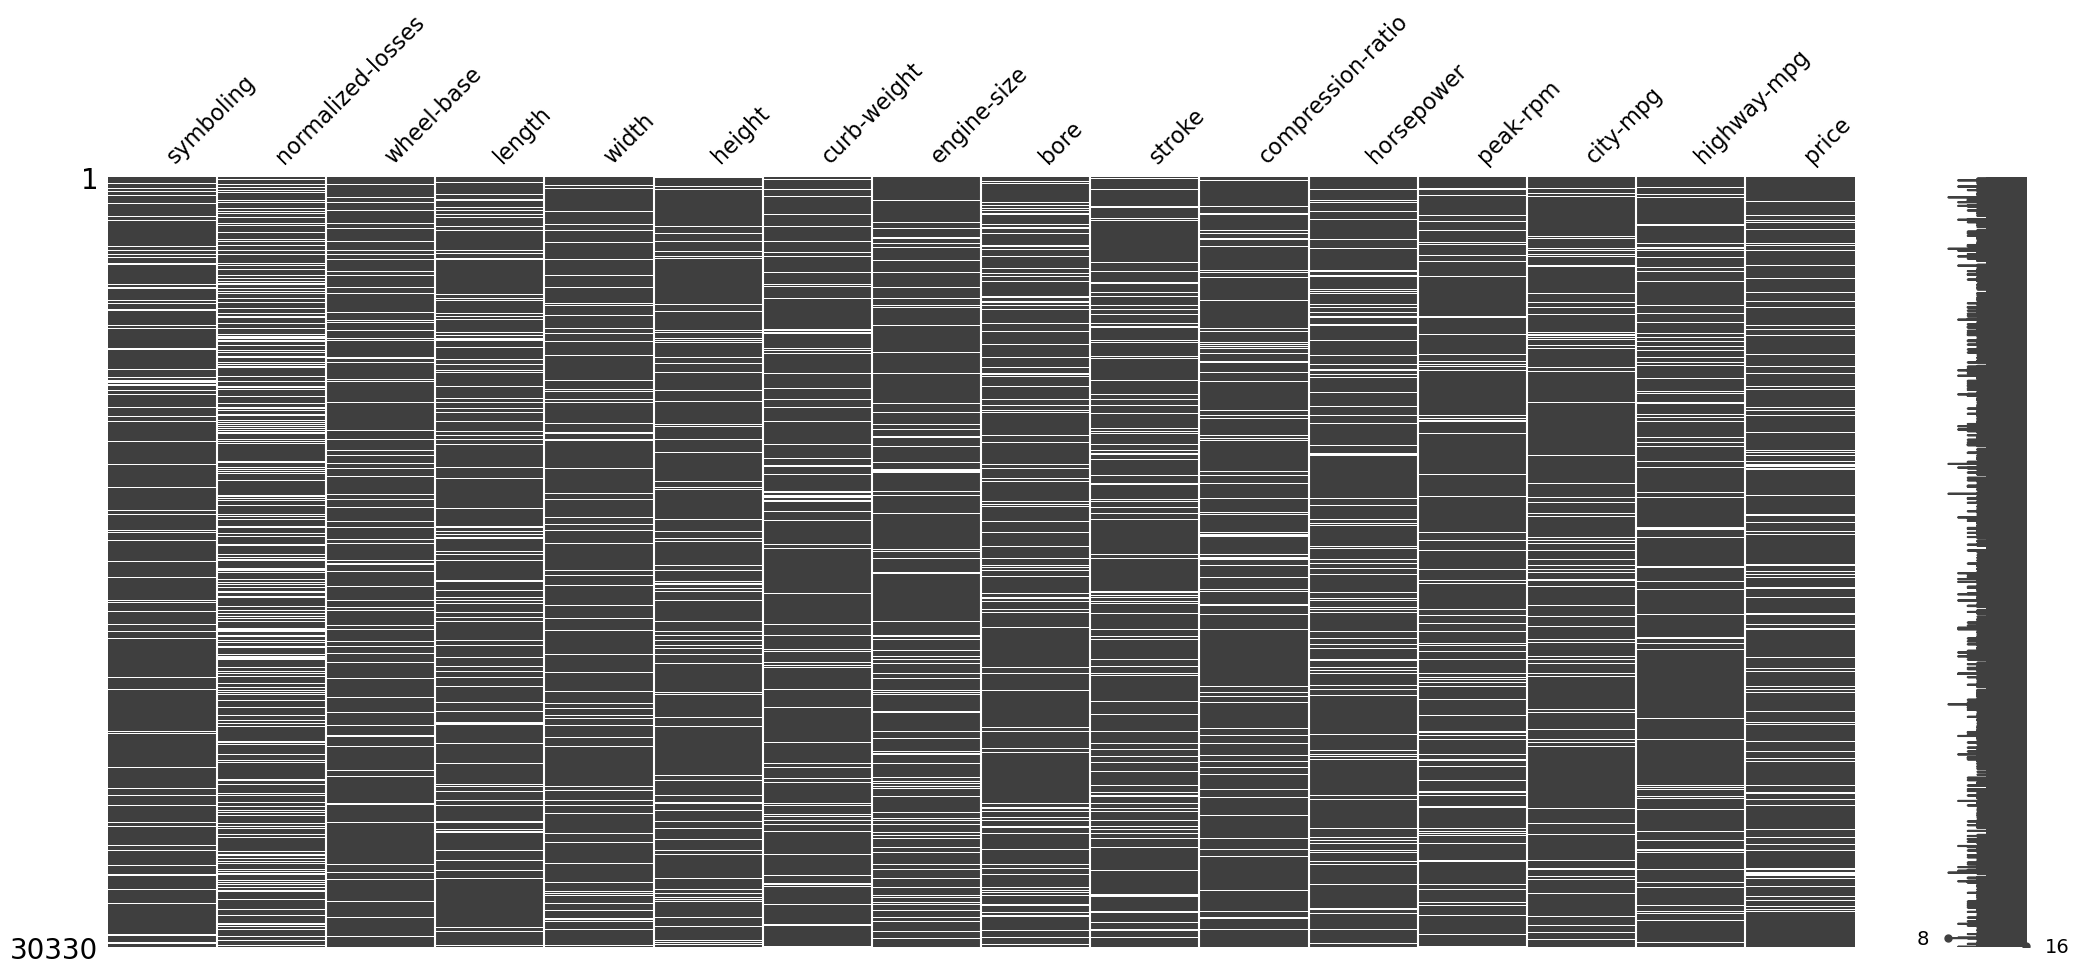

In [6]:
msn.matrix(df[num])

In [7]:
num_columns_missing_values = (df[num].isnull().sum() / len(df) * 100).sort_values(ascending=False).reset_index()
num_columns_missing_values.columns = ['Num Features', 'Missing Percentage %']
num_columns_missing_values

,Num Features,Missing Percentage %
0,normalized-losses,28.229476
1,price,11.889219
2,bore,11.500165
3,stroke,11.384768
4,horsepower,11.236400
5,peak-rpm,10.712166
6,city-mpg,10.224200
7,length,10.128586
8,wheel-base,10.108803
9,engine-size,10.085724


**The 'price' column is our target variable, and we should not impute missing values for it. Filling these missing values could introduce bias into the model, leading to inaccurate predictions and affecting the integrity of the model's results**

In [8]:
df = df.dropna(subset=['price'])

**It's important to check the data distribution before choosing a method**

**Make distribution charts to look the columns distribution**

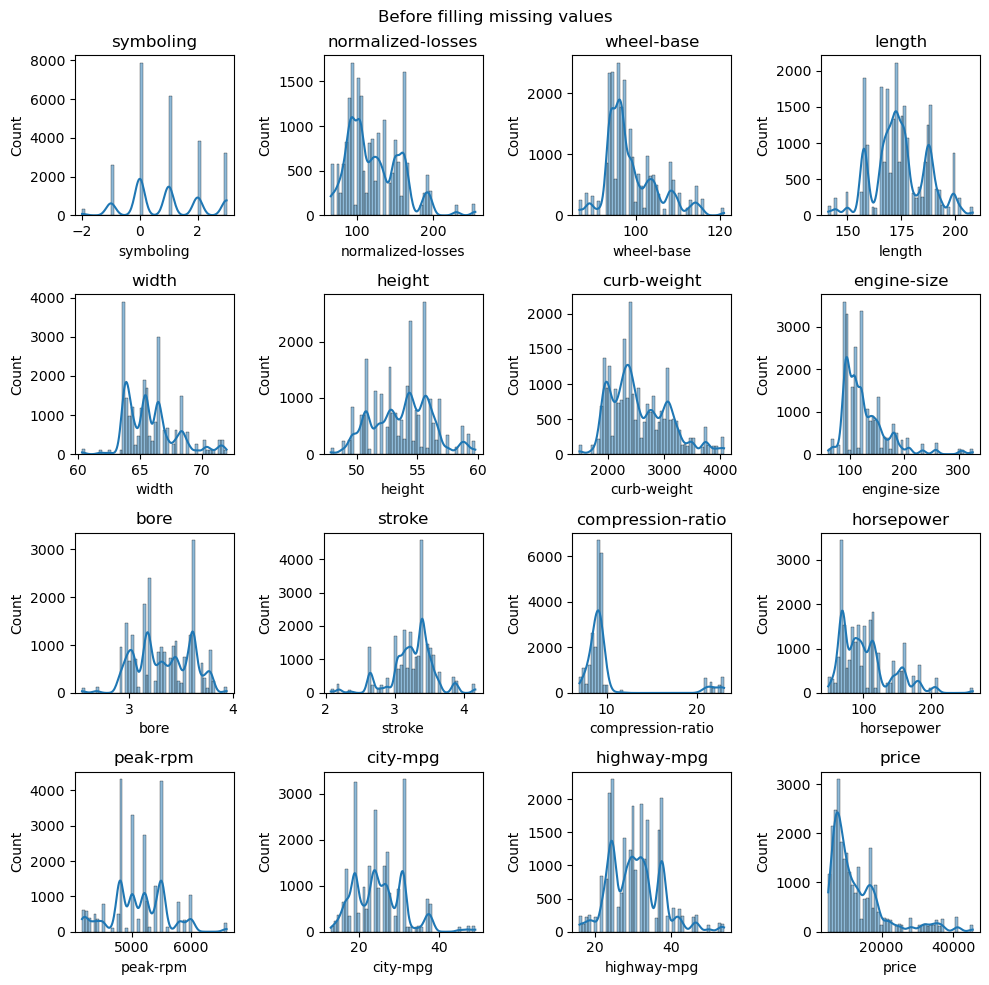

In [9]:
num = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price']

plt.figure(figsize=(10,10))

for i, col in enumerate(num):
    plt.subplot(4,4,i+1)
    sns.histplot(x=df[col],bins=50, kde=True)
    plt.suptitle('Before filling missing values')
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

In [10]:
num = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg']

df[num] = df[num].fillna(df[num].median())

**CATEGORICAL FEATURES**

In [11]:
cat = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system']

<Axes: >

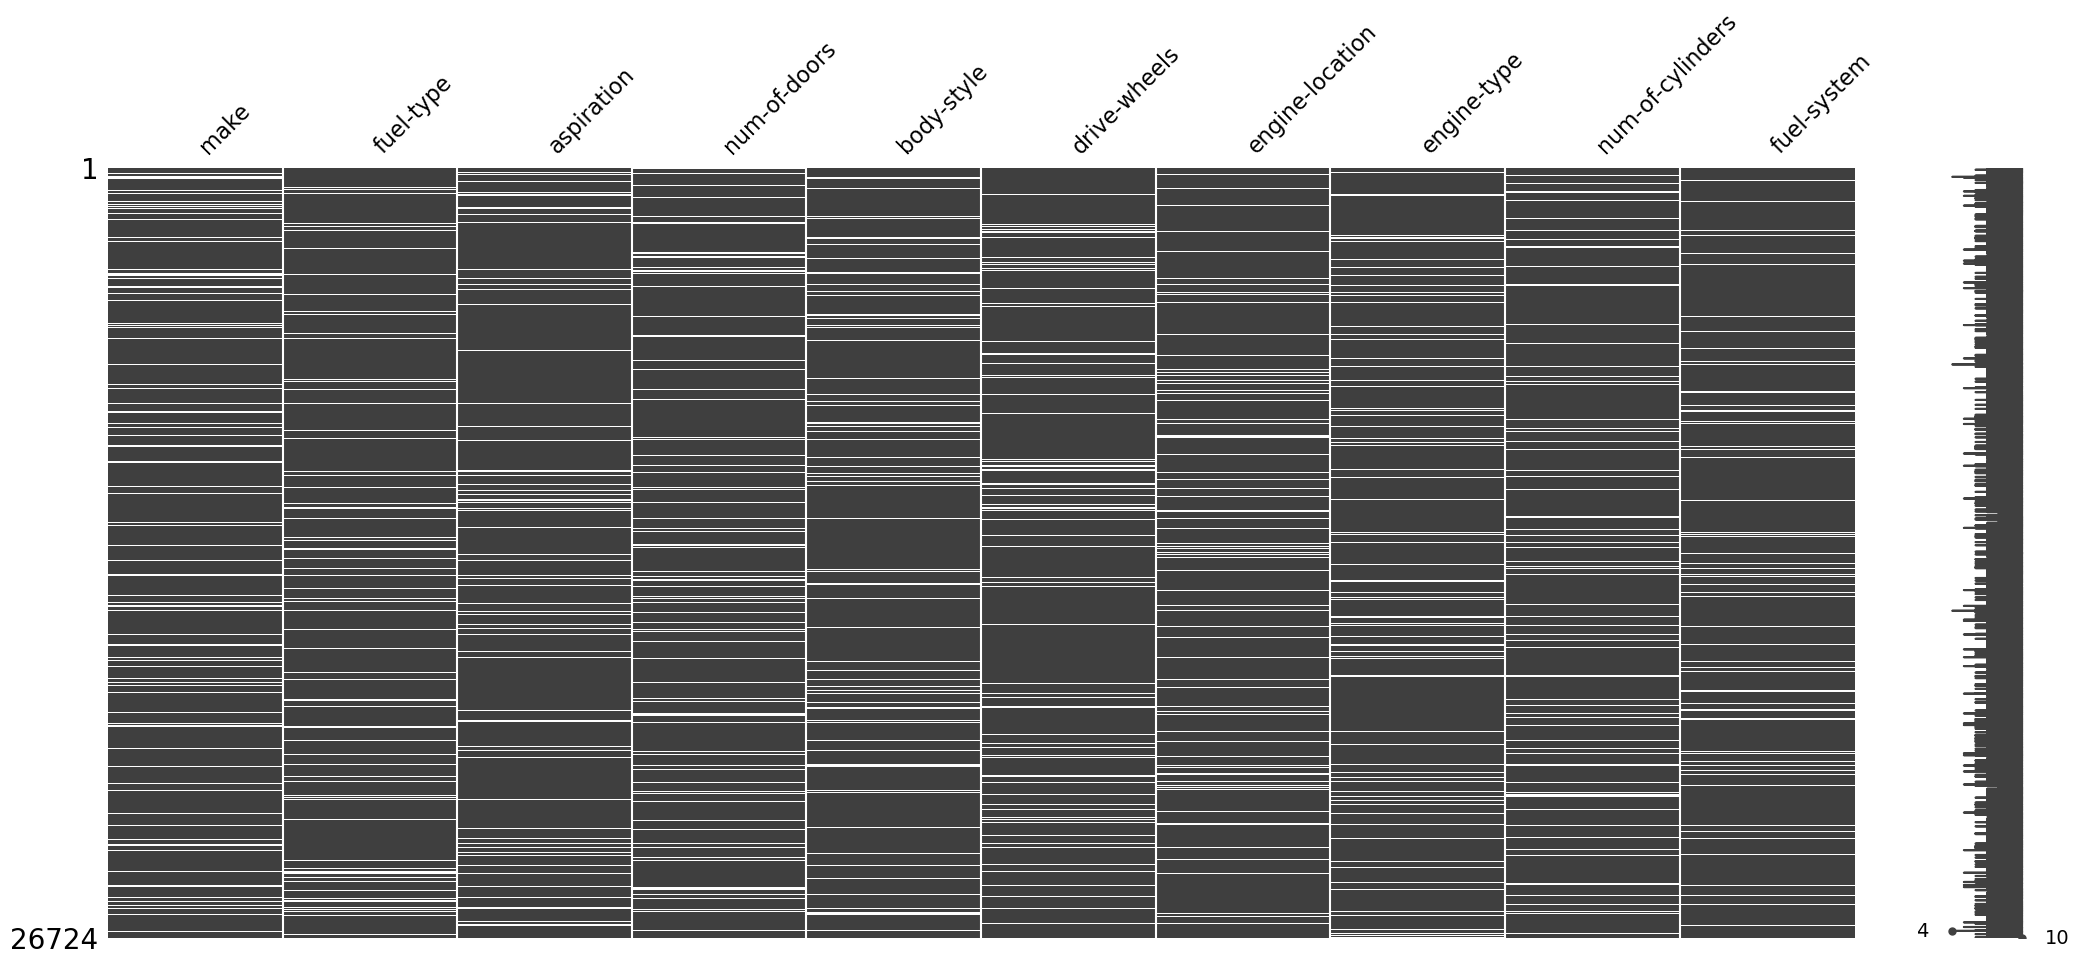

In [12]:
msn.matrix(df[cat])

**DATA IS MCAR**

In [13]:
print(f'Total no of categorical columns are: {len(df.select_dtypes(include='object').columns)}')
print('---------------------------------')

for i in cat:
    print(f'Total no of unique values in {i} are: {df[i].nunique()}')
print('---------------------------------')
for i in cat:
    print(f'\n{df[i].value_counts()}')
print('---------------------------------')
for i in cat:
    print(f'\n{df[i].unique()}')


Total no of categorical columns are: 10
---------------------------------
Total no of unique values in make are: 22
Total no of unique values in fuel-type are: 2
Total no of unique values in aspiration are: 2
Total no of unique values in num-of-doors are: 3
Total no of unique values in body-style are: 5
Total no of unique values in drive-wheels are: 3
Total no of unique values in engine-location are: 2
Total no of unique values in engine-type are: 6
Total no of unique values in num-of-cylinders are: 7
Total no of unique values in fuel-system are: 8
---------------------------------

make
toyota           3801
nissan           2110
mazda            2054
mitsubishi       1603
honda            1499
subaru           1471
volkswagen       1448
peugot           1343
volvo            1238
dodge            1074
bmw               998
mercedes-benz     961
plymouth          826
saab              739
audi              678
porsche           444
jaguar            376
chevrolet         375
alfa-rome

1. WE HAVE MISSING VALUES  

**CATEGORICAL SUMMARY**

**make: This is the manufacturer or brand of the vehicle**

**Check for typos: peugot should be peugeot**

- toyota           3801
- nissan           2110
- mazda            2054
- mitsubishi       1603
- honda            1499
- subaru           1471
- volkswagen       1448
- peugot           1343
- volvo            1238
- dodge            1074
- bmw               998
- mercedes-benz     961
- plymouth          826
- saab              739
- audi              678
- porsche           444
- jaguar            376
- chevrolet         375
- alfa-romero       364
- isuzu             255
- renault           233
- mercury           111

**fuel-type:  Type of fuel used.**
- gas       21689
- diesel     2365

**aspiration**

**Refers to the type of air intake.**
**'std' = standard (naturally aspirated), 'turbo' = turbocharged**
- std      19784
- turbo     4335

**num-of-doors**

**'?' is a placeholder for missing data.**
- four    13677
- two     10166
- ?         232

**body-style: Type of car body**

- sedan          11254
- hatchback       8177
- wagon           3042
- hardtop          911
- convertible      708

**drive-wheels: Type of drivetrain
'fwd' = front-wheel drive
'rwd' = rear-wheel drive
'4wd' = four-wheel drive**

- fwd    13971
- rwd     9031
- 4wd      990

**engine-location**
- front    23762
- rear       317

**engine-type: Engine configuration/type.
'ohc': Overhead camshaft
'ohcv': Overhead camshaft with variation
'dohc': Dual overhead camshaft
'l': Inline (could be mislabeled)
'rotor': Rotary engine
'ohcf': Probably "overhead camshaft flat"**

- ohc      17194
- ohcf      1792
- ohcv      1535
- dohc      1519
- l         1497
- rotor      473

**num-of-cylinders**
- four      18722
- six        2976
- five       1162
- two         466
- eight       461
- three       140
- twelve      117

**fuel-system: Fuel delivery system type.
'mpfi' = Multi-point fuel injection
'2bbl' = 2-barrel carburetor
'idi' = Indirect diesel injection
'1bbl', '4bbl' = carburetor types
'spdi', 'spfi' = single-point fuel injection
'mfi' = mechanical fuel injection**

- mpfi    11001
- 2bbl     7707
- idi      2341
- 1bbl     1270
- spdi     1074
- 4bbl      351
- spfi      144
- mfi       120

In [14]:
cat_columns_missing_values = (df[cat].isnull().sum() / len(df) * 100).sort_values(ascending=False).reset_index()
cat_columns_missing_values.columns = ['Cat Features', 'Missing Percentage %']
cat_columns_missing_values

,Cat Features,Missing Percentage %
0,drive-wheels,10.223021
1,make,10.189343
2,fuel-system,10.163149
3,engine-type,10.155665
4,num-of-cylinders,10.028439
5,fuel-type,9.991019
6,num-of-doors,9.912438
7,engine-location,9.897470
8,body-style,9.848825
9,aspiration,9.747792


In [15]:
df['num-of-doors'] = df['num-of-doors'].replace('?','four')
df['num-of-doors'].value_counts()

num-of-doors
four    13909
two     10166
Name: count, dtype: int64

In [16]:
df['make'] = df['make'].replace('peugot', 'peugoet')

In [17]:
for col in cat:
    df[col] = df[col].fillna(df[col].mode()[0])

In [18]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

**DONE**

---------

### Deal with Outliers

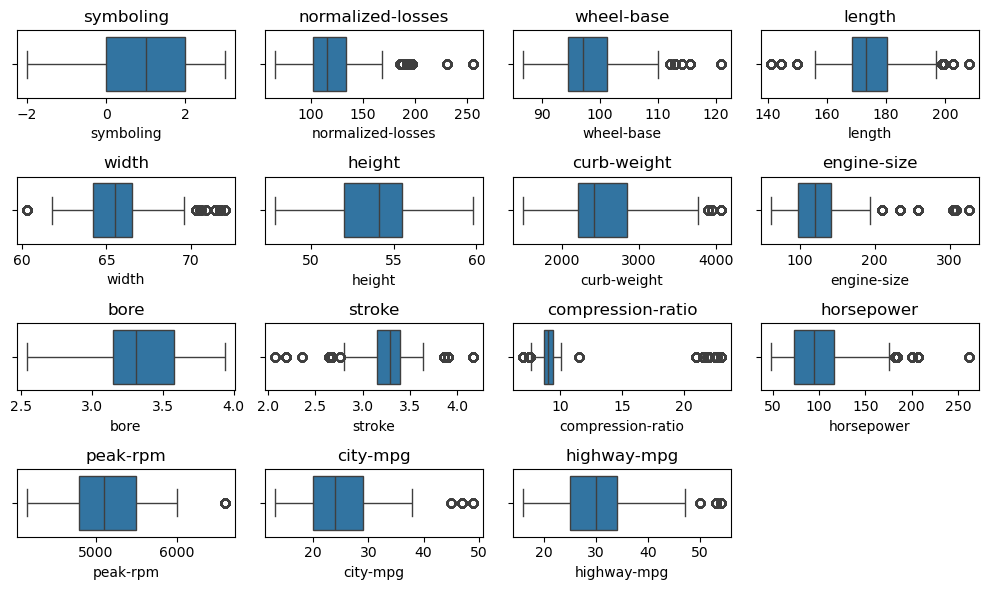

In [19]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(num):
    ax = plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [20]:
outliers = {}

for col in df.select_dtypes(include='number').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    
    outlier_values = df[(df[col] > upper_limit) | (df[col] < lower_limit)][col]
    
    outliers[col] = outlier_values.tolist()

    print(f"\nColumn: {col}")
    print(f"Upper Limit: {upper_limit}, Lower Limit: {lower_limit}")


Column: symboling
Upper Limit: 5.0, Lower Limit: -3.0

Column: normalized-losses
Upper Limit: 182.0, Lower Limit: 54.0

Column: wheel-base
Upper Limit: 111.25, Lower Limit: 84.44999999999999

Column: length
Upper Limit: 197.70000000000005, Lower Limit: 151.29999999999995

Column: width
Upper Limit: 69.94999999999999, Lower Limit: 60.75000000000001

Column: height
Upper Limit: 60.75, Lower Limit: 46.75

Column: curb-weight
Upper Limit: 3799.5, Lower Limit: 1259.5

Column: engine-size
Upper Limit: 205.5, Lower Limit: 33.5

Column: bore
Upper Limit: 4.2250000000000005, Lower Limit: 2.505

Column: stroke
Upper Limit: 3.775, Lower Limit: 2.775

Column: compression-ratio
Upper Limit: 10.450000000000003, Lower Limit: 7.649999999999998

Column: horsepower
Upper Limit: 180.5, Lower Limit: 8.5

Column: peak-rpm
Upper Limit: 6550.0, Lower Limit: 3750.0

Column: city-mpg
Upper Limit: 42.5, Lower Limit: 6.5

Column: highway-mpg
Upper Limit: 47.5, Lower Limit: 11.5

Column: price
Upper Limit: 29587

In [21]:
df = df[(df[col] <= upper_limit) & (df[col] >= lower_limit)]

**DONE**

-------------

### Correlation Matrix

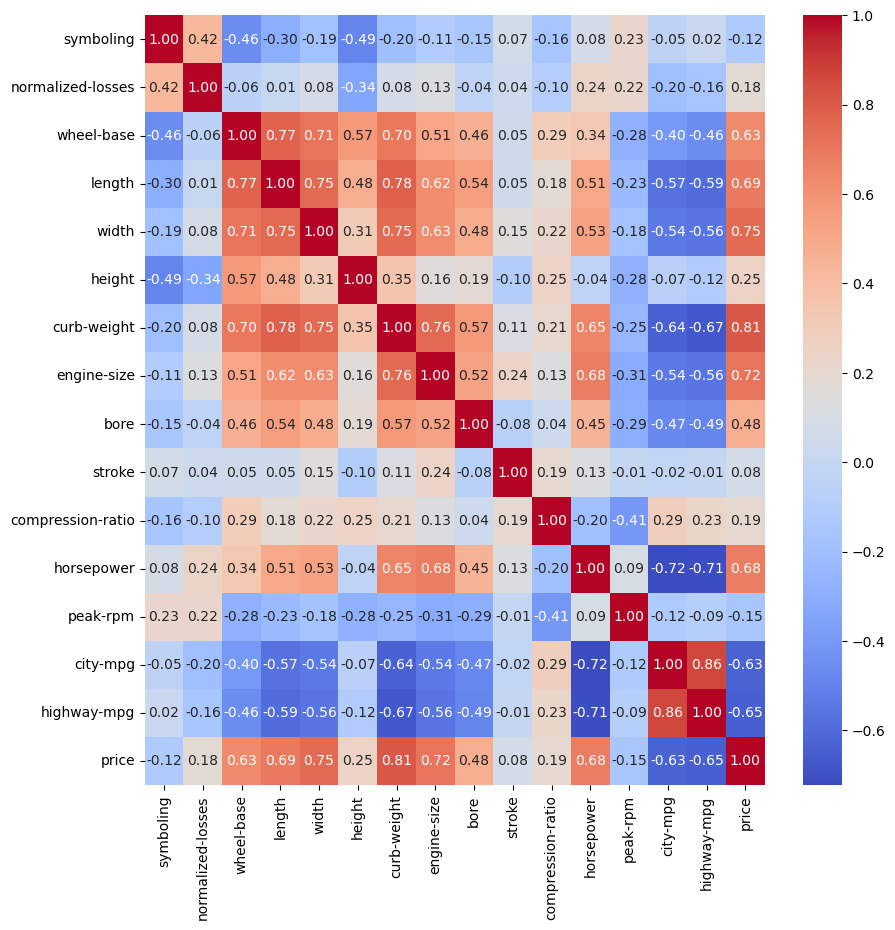

In [22]:
num = df.select_dtypes(include=['int64', 'float64']).columns
num

plt.figure(figsize=(10,10))
sns.heatmap(df[num].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

- **Target column price: highly correlated with 'wheel-base','lenght','width','curb-weight','engine-size','horsepower','city-mpg','highway-mpg'**
- **Wheel-base highly correlated with 'lenght','width','curb-weight'**
- **Horsepower highly correlated with 'city-mpg','highway-mpg'**

- **correlation ≥ 0.8 is considered high.**
- **correlation ≥ 0.9 is considered very high, and often signals multicollinearity.**
- **If two features have |corr| > 0.7, you might drop one of them to avoid redundancy in your ML model.**



------------

## Exploratory Data Analysis

### Univariate Analysis

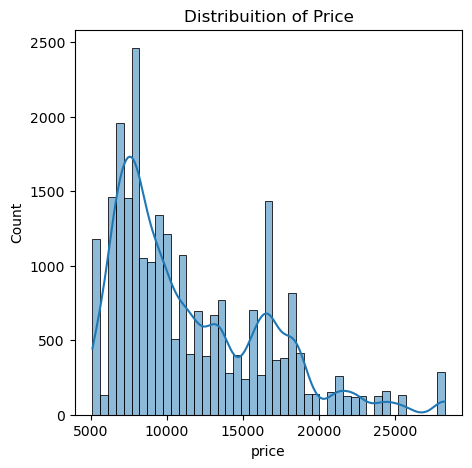

In [23]:
plt.figure(figsize=(5,5))
sns.histplot(x= df['price'], kde=True)
plt.title('Distribuition of Price')
plt.show()


**Price distribution is right skewed**

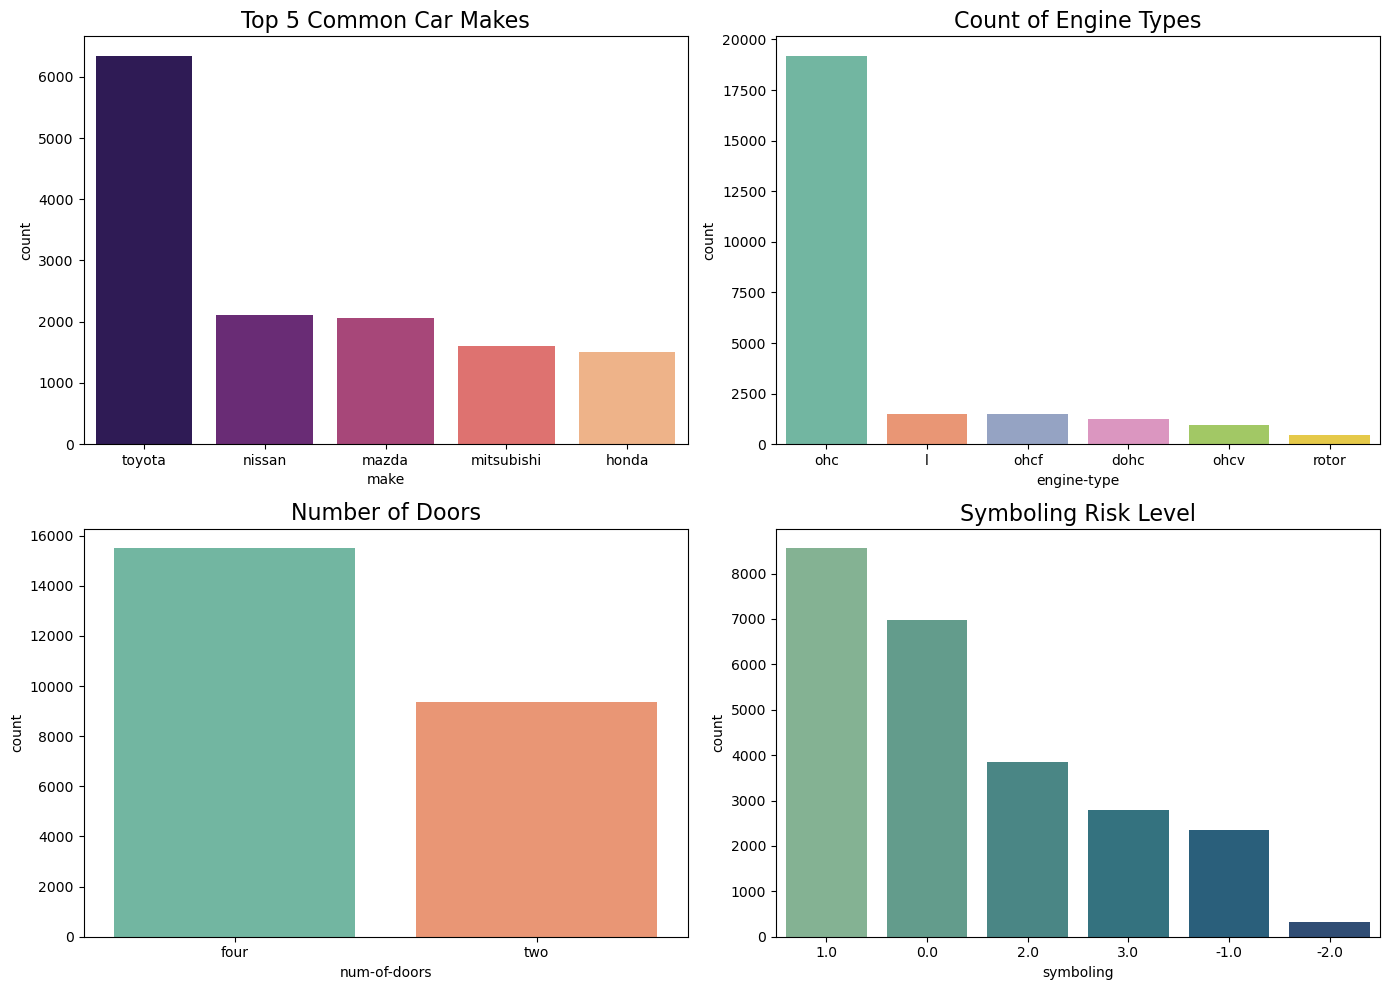

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  

# Top 5 Common Car Makes
sns.countplot(x='make', data=df, 
              order=df['make'].value_counts().nlargest(5).index,
              palette='magma', ax=axes[0, 0])
axes[0, 0].set_title('Top 5 Common Car Makes', fontsize=16)

# Count of Engine Types
sns.countplot(x='engine-type', data=df, 
              palette='Set2', 
              order=df['engine-type'].value_counts().index,
              ax=axes[0, 1])
axes[0, 1].set_title('Count of Engine Types', fontsize=16)

# Number of doors
sns.countplot(x='num-of-doors', data=df, 
              order=df['num-of-doors'].value_counts().index,
              palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Number of Doors', fontsize=16)

# Symboling Risk Level
sns.countplot(x='symboling', data=df, 
              order=df['symboling'].value_counts().index,
              palette='crest', ax=axes[1, 1])
axes[1, 1].set_title('Symboling Risk Level', fontsize=16)

plt.tight_layout()
plt.show()

- **Toyota appears to be the most frequently occurring car make in the dataset, indicating its strong market presence**
- **OHC (Overhead Camshaft) is the most frequently used engine type among the vehicles in the dataset, indicating its widespread adoption.**
- **The dataset shows that four-door cars are the most prevalent, suggesting a preference for larger vehicle configurations**
- **The majority of cars in the dataset fall under symboling risk levels 1 and 0, indicating that most vehicles are considered low-risk**

--------

### Bivariate Analaysis

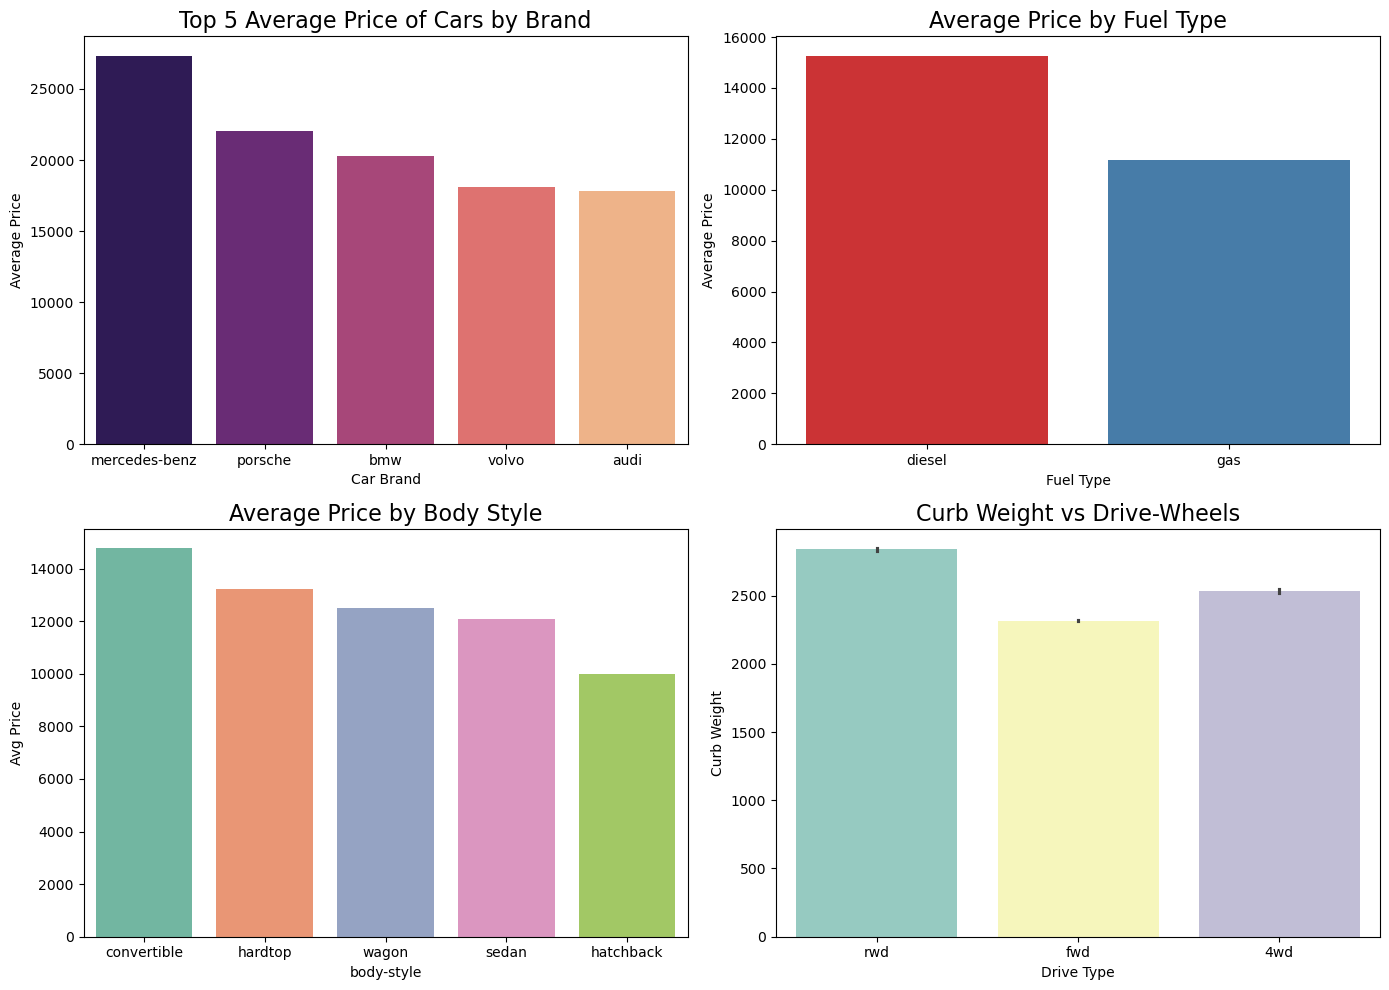

In [25]:
car_brands_avg_price = df.groupby('make')['price'].mean().reset_index().sort_values(by='price', ascending=False).head(5)
fuel_type_price = df.groupby('fuel-type')['price'].mean().reset_index()
body_style_avg_price = df.groupby('body-style')['price'].mean().sort_values(ascending=False).reset_index()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top 5 Average Price of Cars by Brand
sns.barplot(x='make', y='price', data=car_brands_avg_price, palette='magma', ax=axes[0, 0])
axes[0, 0].set_title('Top 5 Average Price of Cars by Brand', fontsize=16)
axes[0, 0].set_xlabel('Car Brand')
axes[0, 0].set_ylabel('Average Price')

# Average Price by Fuel Type
sns.barplot(x='fuel-type', y='price', data=fuel_type_price, palette='Set1', ax=axes[0, 1])
axes[0, 1].set_title('Average Price by Fuel Type', fontsize=16)
axes[0, 1].set_xlabel('Fuel Type')
axes[0, 1].set_ylabel('Average Price')

# Average Price by Body Style
sns.barplot(x='body-style', y='price', data=body_style_avg_price, palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Average Price by Body Style', fontsize=16)
axes[1, 0].set_ylabel('Avg Price')

# Curb Weight vs Drive-Wheels
sns.barplot(x='drive-wheels', y='curb-weight', data=df, palette='Set3', ax=axes[1, 1])
axes[1, 1].set_title('Curb Weight vs Drive-Wheels', fontsize=16)
axes[1, 1].set_xlabel('Drive Type')
axes[1, 1].set_ylabel('Curb Weight')

plt.tight_layout()
plt.show()

- **Luxury brands like Mercedes-Benz, Porsche, BMW, Volvo, and Audi are priced significantly higher than other manufacturers**
- **Diesel cars tend to have a higher average price compared to gas-powered cars**
- **Convertibles and hardtops tend to have higher average prices**
- **RWD cars have the highest curb weight, surpassing both FWD and 4WD configurations.**

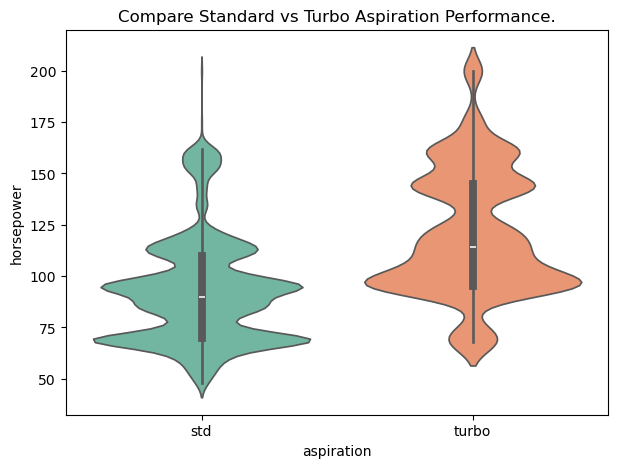

In [26]:
plt.figure(figsize=(7,5))
sns.violinplot(x='aspiration', y='horsepower', data=df, palette='Set2')
plt.title('Compare Standard vs Turbo Aspiration Performance.')
plt.show()

**Turbo cars have higher horsepower on average compared to standard (std) cars.**

----------

### Multivariate Analysis

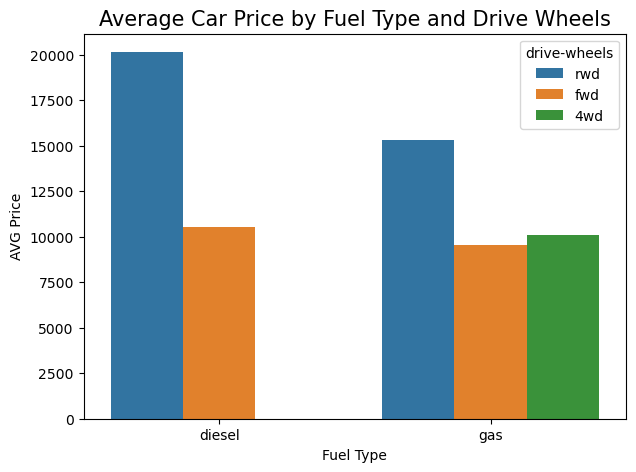

In [27]:
fuel_drive_price = df.groupby(['fuel-type','drive-wheels'])['price'].mean().reset_index().sort_values(by='price',ascending=False)

plt.figure(figsize=(7,5))
sns.barplot(x='fuel-type',y='price',data=fuel_drive_price,hue='drive-wheels')
plt.title('Average Car Price by Fuel Type and Drive Wheels',fontsize=15)
plt.xlabel('Fuel Type')
plt.ylabel('AVG Price')
plt.show()

**RWD cars have the highest average prices for both diesel and gas fuel types. On the other hand, 4WD cars are exclusively found in gas, while FWD cars have comparable prices across both fuel types**

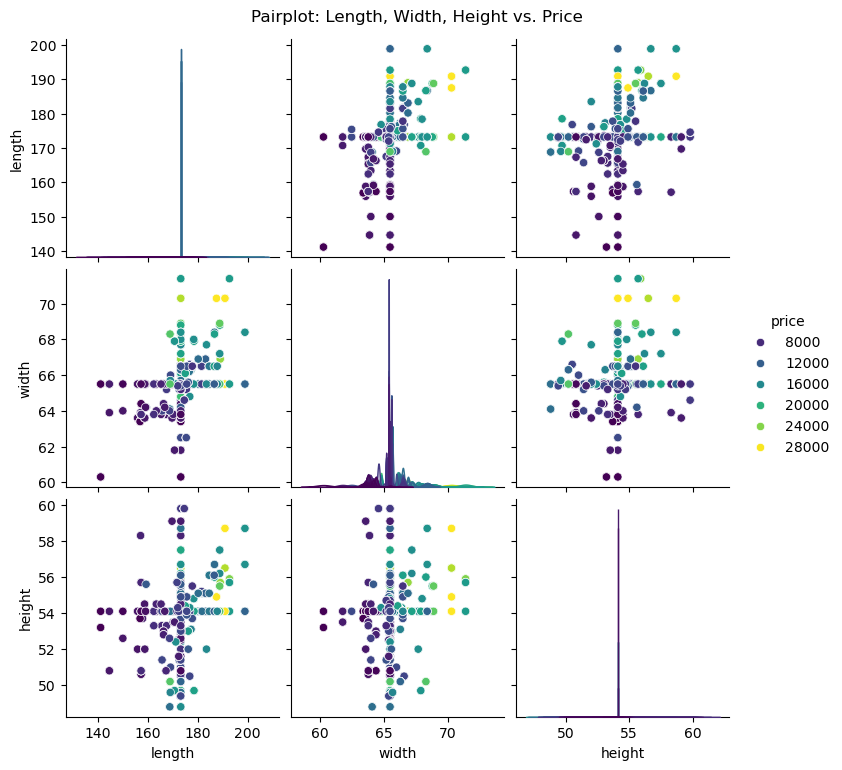

In [28]:
df_subset = df[['length', 'width', 'height', 'price']]

sns.pairplot(df_subset, hue='price', palette='viridis')
plt.suptitle('Pairplot: Length, Width, Height vs. Price', y=1.02)
plt.show()

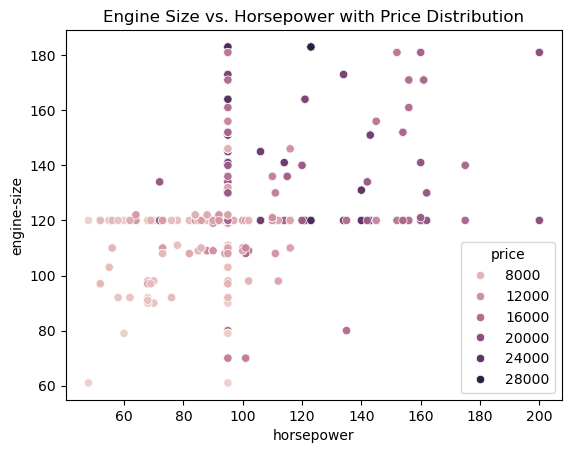

In [29]:
sns.scatterplot(x= 'horsepower', y = 'engine-size', data=df, hue ='price')
plt.title('Engine Size vs. Horsepower with Price Distribution')
plt.show()

**Higher engine-size and horsepower are associated with higher prices.**

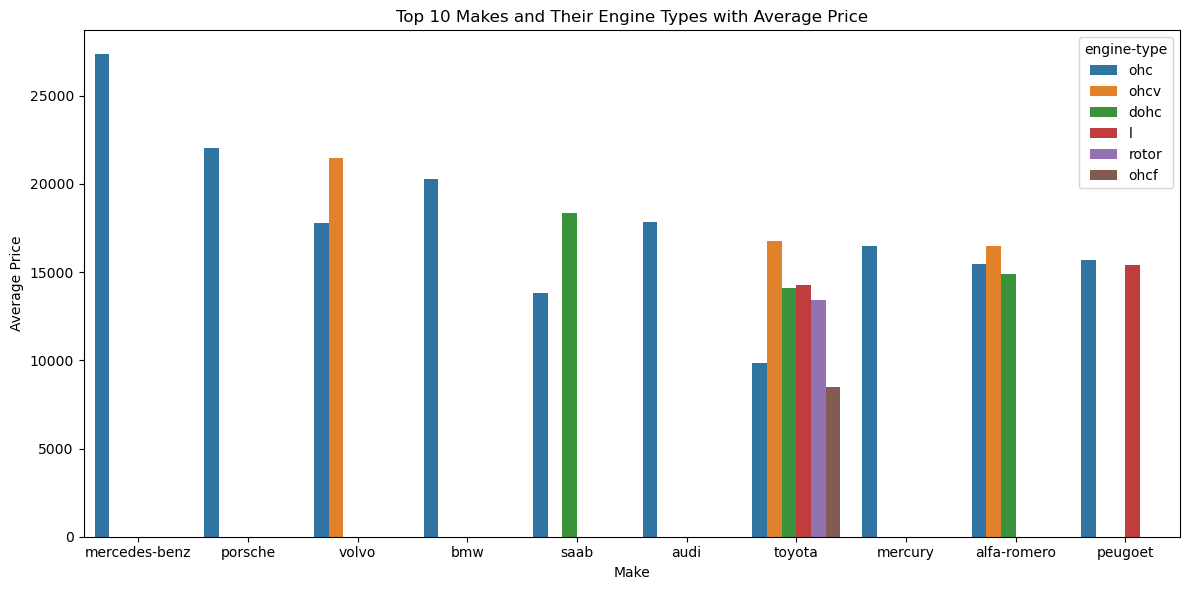

In [30]:
make_engine_avgprice = df.groupby(['make', 'engine-type'])['price'].mean().sort_values(ascending=False).reset_index()
top_10_makes = make_engine_avgprice.groupby('make')['price'].mean().sort_values(ascending=False).head(10).index
top_10_make_engine_avgprice = make_engine_avgprice[make_engine_avgprice['make'].isin(top_10_makes)]

plt.figure(figsize=(12, 6))
sns.barplot(x='make', y='price', data=top_10_make_engine_avgprice, hue='engine-type')
plt.title('Top 10 Makes and Their Engine Types with Average Price')
plt.xlabel('Make')
plt.ylabel('Average Price') 
plt.tight_layout()
plt.show()

**Luxury car brands are primarily associated with OHC engine types, with Volvo at the forefront of OHCV engines, Saab leading in DOHC configurations, and Toyota representing all engine types. Alfa Romeo excels in IHC, OHCV, and DOHC, while Peugeot stands out in OHC and Inline engine types**

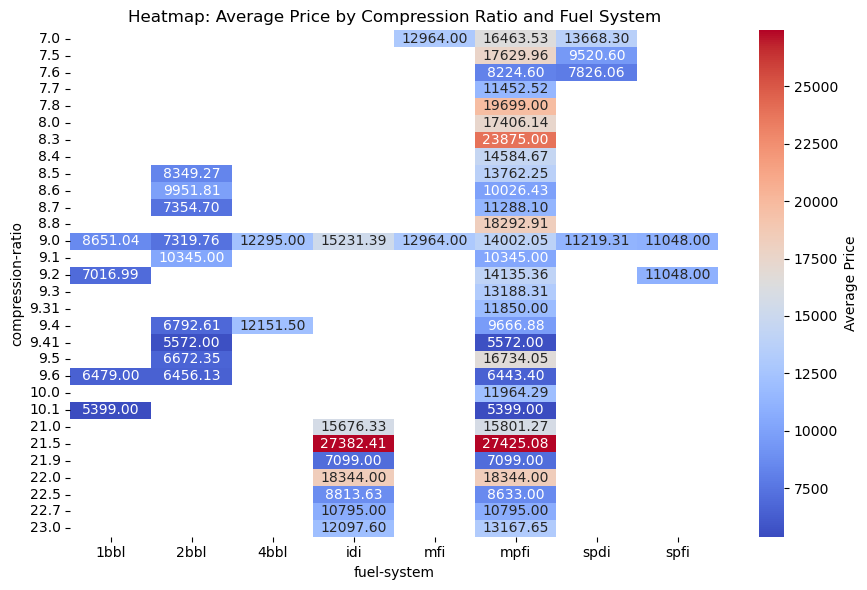

In [31]:
compression_fuel_avgprice = df.groupby(['compression-ratio', 'fuel-system'])['price'].mean().reset_index()
heatmap_data = compression_fuel_avgprice.pivot(index='compression-ratio', columns='fuel-system', values='price')

plt.figure(figsize=(9, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Average Price'})
plt.title('Heatmap: Average Price by Compression Ratio and Fuel System')
plt.tight_layout()
plt.show()

- **Cars with mpfi fuel system and high compression ratios (e.g., ~21.5–22) have the highest average prices (27425.08, 27382.41).**
- **Similarly, idi fuel system at high compression ratio (~21.5) also shows a high price (15676.33).**
- **Cars with lower compression ratios (~9 to 10) and carburetor-based fuel systems (1bbl, 2bbl) show low average prices, like 5572.00, 6456.13.**

----------

## Feature Engineering

### Encoding Categorical Features

In [32]:
cat

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

**Why i choose these methods**
- Ordinal Encoding: Used for 'no-of-cylinders' because it represents an ordered category, where higher values signify more cylinders, and there's an inherent order to the values (2, 3, 4, 6, 8, 12).
- One-Hot Encoding: Applied to 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-type', and 'fuel-system' because these are nominal (unordered) features, and one-hot encoding helps create a binary representation for each category.
- Dropping 'engine-location': The 'engine-location' column is dropped as it's not deemed necessary for the analysis, possibly because it doesn't contribute useful information to the model's predictive power

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline

In [34]:
def map_cylinders(X):
    mapping = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
    return X.replace(mapping)

In [35]:
ordinal_col = ['num-of-cylinders']
onehot_cols = ['make', 'fuel-type', 'aspiration', 'num-of-doors','body-style', 'drive-wheels', 'engine-type', 'fuel-system']

# ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('cyl_map', FunctionTransformer(map_cylinders, validate=False), ordinal_col),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), onehot_cols)])

In [36]:
X_transformed = preprocessor.fit_transform(df)
print(X_transformed.shape)  
preprocessor

(24854, 42)


ColumnTransformer(transformers=[('cyl_map',
                                 FunctionTransformer(func=<function map_cylinders at 0x0000020FBDF36D40>),
                                 ['num-of-cylinders']),
                                ('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['make', 'fuel-type', 'aspiration',
                                  'num-of-doors', 'body-style', 'drive-wheels',
                                  'engine-type', 'fuel-system'])])

In [37]:
preprocessor.fit(df)
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(onehot_cols)

all_feature_names = list(ordinal_col) + list(onehot_feature_names)
X_transformed = preprocessor.transform(df)
X_df = pd.DataFrame(X_transformed.toarray() if hasattr(X_transformed, 'toarray') else X_transformed, columns=all_feature_names)

X_df.head()

,num-of-cylinders,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugoet,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_gas,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


--------

In [38]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

### Feature Scaling and Selection

In [39]:
df_cleaned = df.drop(columns=['make','engine-type', 'fuel-type', 'aspiration', 'num-of-doors', 'num-of-cylinders', 
                              'body-style', 'drive-wheels', 'engine-location', 'fuel-system', 'engine-location'])

**We remove the original categorical columns from the dataset, apply the appropriate encoding (one-hot or ordinal), and then combine the encoded columns with the cleaned dataset to avoid duplicates.**

In [40]:
df = pd.concat([df_cleaned, X_df], axis=1)

In [41]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,num-of-cylinders,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugoet,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_gas,aspiration_turbo,num-of-doors_two,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,115.0,88.6,168.8,64.1,54.1,2548.0,120.0,3.47,2.68,9.0,111.0,5100.0,21.0,27.0,13495.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.0,115.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5100.0,21.0,27.0,16500.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,115.0,94.5,171.2,65.5,52.4,2823.0,152.0,3.31,3.47,9.0,154.0,5100.0,19.0,26.0,16500.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.29,10.0,102.0,5500.0,24.0,30.0,13950.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.0,164.0,99.4,173.2,65.5,54.3,2824.0,136.0,3.31,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
df[num].head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,115.0,88.6,168.8,64.1,54.1,2548.0,120.0,3.47,2.68,9.0,111.0,5100.0,21.0,27.0,13495.0
1,3.0,115.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5100.0,21.0,27.0,16500.0
2,1.0,115.0,94.5,171.2,65.5,52.4,2823.0,152.0,3.31,3.47,9.0,154.0,5100.0,19.0,26.0,16500.0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.29,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,99.4,173.2,65.5,54.3,2824.0,136.0,3.31,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


**Normalization (Min-Max Scaling)**
- Best for, Features where the range is fixed or constrained, or when you know the range of the data and want to bring everything between 0 and 1.
- Best for 'city-mpg', 'highway-mpg', 'normalized-losses', 'bore', 'stroke' (features where values are constrained within a certain range).

**Standardization (Z-Score Scaling)**
- Best for, Features that don’t have a fixed range, particularly when you want the data to have a mean of 0 and a standard deviation of, Standardization is more robust to outliers compared to normalization.
- Best for 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'horsepower', 'peak-rpm', 'compression-ratio' (features with larger magnitudes that may benefit from being centered)

In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [44]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

standardize_columns = ['wheel-base', 'length', 'width', 'height', 'curb-weight','engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm']

normalize_columns = ['city-mpg', 'highway-mpg', 'normalized-losses']

df[standardize_columns] = standard_scaler.fit_transform(df[standardize_columns])
df[normalize_columns] = min_max_scaler.fit_transform(df[normalize_columns])

In [52]:
df[standardize_columns].head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm
0,-1.893760,-0.395506,-0.881026,0.122766,0.161933,0.040237,0.655835,-1.985483,-0.281098,0.482055,-0.03442
1,-1.893760,-0.395506,-0.881026,-2.171625,0.161933,0.430832,0.655835,-1.985483,-0.281098,0.482055,-0.03442
2,-0.727853,-0.171570,-0.077796,-0.613171,0.813711,1.290143,0.007359,0.737596,-0.281098,1.992349,-0.03442
3,0.319486,0.332286,0.323819,0.209347,-0.338159,-0.389419,-0.478998,0.117148,-0.019385,0.165947,0.85624
4,0.240442,0.015043,-0.077796,0.209347,0.816081,0.665190,0.007359,0.496311,-0.542810,0.622547,0.85624


In [53]:
df[normalize_columns].head()

,city-mpg,highway-mpg,normalized-losses
0,0.151515,0.205882,0.261780
1,0.151515,0.205882,0.261780
2,0.090909,0.176471,0.261780
3,0.242424,0.294118,0.518325
4,0.060606,0.058824,0.518325


**Check Correlation**

In [60]:
correlation_with_target = df.corr()['price'].sort_values(ascending=False)

print("Top positively correlated:\n", correlation_with_target.head(10))
print("\nTop negatively correlated:\n", correlation_with_target.tail(10))


Top positively correlated:
 price                1.000000
curb-weight          0.808543
width                0.747462
engine-size          0.716903
length               0.692974
horsepower           0.683594
wheel-base           0.633325
bore                 0.480377
height               0.247751
compression-ratio    0.194251
Name: price, dtype: float64

Top negatively correlated:
 engine-type_ohcv     -0.006204
fuel-system_mpfi     -0.008173
make_saab            -0.008623
body-style_hardtop   -0.010689
make_toyota          -0.013960
num-of-cylinders     -0.014323
symboling            -0.118872
peak-rpm             -0.148818
city-mpg             -0.630315
highway-mpg          -0.646169
Name: price, dtype: float64


- **CURB-WEIGHT, WIDTH, ENGINE SIZE, LENGTH, HORSEPOWER, WHEEL BASE ARE HIGHLY POSITIVELY CORRELATED WITH THE TARGET COLUMN**
- **HIGHWAY MPG, CITY MPG ARE HIGHLY NEGATIVELY CORRELATED WITH THE TARGET COLUMN**

In [ ]:
features_df = df.drop(columns=['price'])
corr_matrix = features_df.corr()

threshold = 0.7

high_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack().reset_index())
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr = high_corr[abs(high_corr['Correlation']) > threshold]

print("Highly correlated input features:\n", high_corr.sort_values(by='Correlation', ascending=False))

Highly correlated input features:
                  Feature 1         Feature 2  Correlation
1310           make_subaru  engine-type_ohcf     0.891614
650               city-mpg       highway-mpg     0.858707
1178          make_peugoet     engine-type_l     0.850561
167                 length       curb-weight     0.780049
1569     engine-type_rotor  fuel-system_4bbl     0.774438
111             wheel-base            length     0.771318
321            curb-weight       engine-size     0.755656
165                 length             width     0.751276
219                  width       curb-weight     0.751035
1000            make_isuzu  fuel-system_spfi     0.718215
112             wheel-base             width     0.714989
114             wheel-base       curb-weight     0.700564
1460  body-style_hatchback  body-style_sedan    -0.708159
563             horsepower       highway-mpg    -0.713181
562             horsepower          city-mpg    -0.722559
1401         fuel-type_gas   fuel-sys

engine-size may matter more for predicting power/performance

In [64]:
df = df.drop(columns=['wheel-base', 'width', 'curb-weight'])

In [65]:
df['avg-mpg'] = (df['city-mpg'] + df['highway-mpg']) / 2
df = df.drop(columns=['city-mpg', 'highway-mpg'])

## Apply Machine Learning Algorithms 

### Linear Regression

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [71]:
x = df.drop(columns=['price'], axis=1)
y = df['price']

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [70]:
lr = LinearRegression()

In [74]:
lr_train = lr.fit(x_train, y_train)

lr_train_y_pred = lr.predict(x_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values